In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyLDAvis

  Using cached pandas-1.3.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached numpy-1.21.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.0
    Uninstalling pandas-1.1.0:
      Successfully uninstalled pandas-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.7 which is incompatible.


In [ ]:
pip install numpy==1.19.2

  Using cached numpy-1.19.2-cp37-cp37m-manylinux2010_x86_64.whl (14.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.7 which is incompatible.


In [ ]:
pip install pandas==1.1.0

  Using cached pandas-1.1.0-cp37-cp37m-manylinux1_x86_64.whl (10.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.1
    Uninstalling pandas-1.3.1:
      Successfully uninstalled pandas-1.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.2 which is incompatible.
pyldavis 3.3.1 requires pandas>=1.2.0, but you have pandas 1.1.0 which is incompatible.


In [ ]:
pip install folium==0.2.1

In [ ]:
pip install imgaug==0.2.7

In [ ]:
pip install gensim

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import collections
import spacy
from pprint import pprint

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import subprocess
from gensim.models.wrappers import LdaMallet

# NLTK
from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# Import Pre-Processed Data

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/YouTube-Project/pre-processed-reply-merge.pkl')

In [ ]:
df.shape

(47081, 10)

In [ ]:
# iterating the columns
for col in df.columns:
    print(col)

channel
name
comment
date
time
likes
tidy_comment
tidy_comment_tokens
tokens_no_stop
no_stop_joined


In [ ]:
print(df.head(10))

       channel  ...                                     no_stop_joined
0  Simplilearn  ...  enroll free machine learning course completion...
1  Simplilearn  ...                         datasets email tanmaygarde
2  Simplilearn  ...  watching sent requested dataset mail show love...
3  Simplilearn  ...                   great request data reach nirbhay
4  Simplilearn  ...  great tutorial could send datasets used tutori...
5  Simplilearn  ...      possible dataset want implement codes advance
6  Simplilearn  ...  hello viewing tutorial helpful provide email s...
7  Simplilearn  ...   amazing tutorial simplilearn help datasets peppa
8  Simplilearn  ...  great tutorial share datasets used mail somosreee
9  Simplilearn  ...  nice tutorial send datasets used tutorial pros...

[10 rows x 10 columns]


# Bigrams


In [ ]:
# Create list of lists containing bigrams in comments
terms_bigram = [list(bigrams(comment)) for comment in df['tokens_no_stop']]

# View bigrams for the first comment
terms_bigram[0]

[('enroll', 'free'),
 ('free', 'machine'),
 ('machine', 'learning'),
 ('learning', 'course'),
 ('course', 'completion'),
 ('completion', 'certificate')]

In [ ]:
# Flatten list of bigrams in clean comments
bigrams = list(itertools.chain(*terms_bigram))

In [ ]:
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])
# bigram_df = pd.DataFrame(bigram_counts.most_common(), columns=['bigram', 'count'])

In [ ]:
len(bigram_counts)


277438

In [ ]:
bigram_df.columns

Index(['bigram', 'count'], dtype='object')

In [ ]:
print(bigram_df)

                    bigram  count
0      (machine, learning)   2363
1          (data, science)   1857
2     (requested, dataset)   1255
3          (dataset, mail)   1040
4        (neural, network)    857
5            (could, send)    822
6     (subscribe, channel)    815
7        (sent, requested)    777
8          (send, dataset)    734
9         (deep, learning)    653
10         (josh, starmer)    618
11      (neural, networks)    579
12            (send, data)    518
13  (supervised, learning)    505
14       (mail, subscribe)    467
15       (great, tutorial)    466
16        (provide, email)    462
17        (watching, sent)    457
18    (develops, emotions)    453
19       (send, requested)    440
20      (helpful, provide)    439
21     (object, detection)    436
22          (email, could)    432
23     (dataset, promptly)    430
24       (data, scientist)    429


In [ ]:
bigram_df.to_excel('bigrams.xlsx', sheet_name='Sheet1')

Number of Bigrams Identified 25


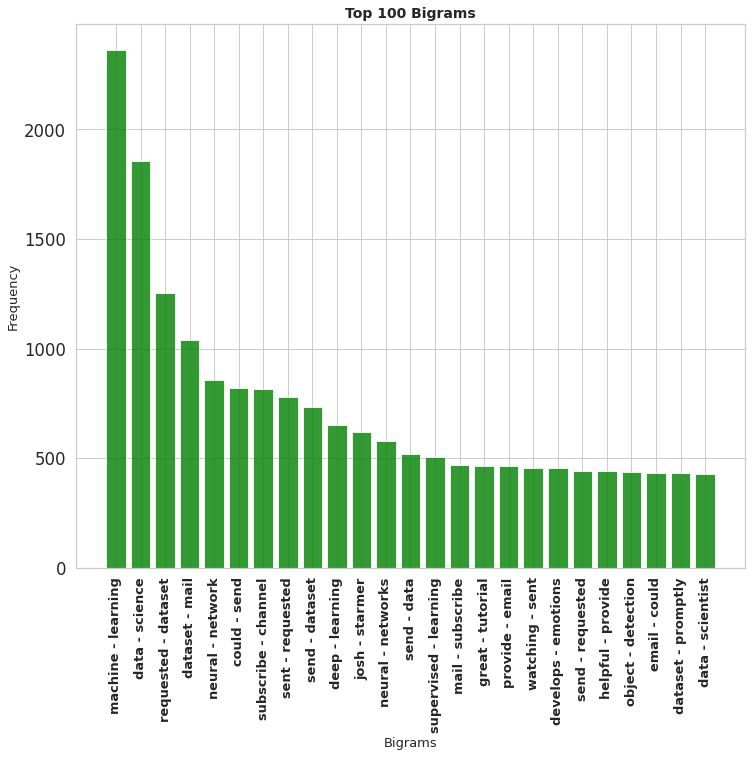

In [ ]:
bigram_label = ['machine - learning','data - science', 'requested - dataset', 'dataset - mail','neural - network',
                'could - send', 'subscribe - channel','sent - requested','send - dataset','deep - learning',
                'josh - starmer','neural - networks','send - data', 'supervised - learning','mail - subscribe',
                'great - tutorial','provide - email','watching - sent','develops - emotions','send - requested',
                'helpful - provide','object - detection','email - could','dataset - promptly', 'data - scientist']
bigram_freq = bigram_df['count'].head(25)
index = np.arange(len(bigram_freq))

print("Number of Bigrams Identified", len(bigram_df))
plt.figure(figsize=(12,10))
plt.bar(index, bigram_freq, alpha=0.8, color= 'green')
plt.xlabel('Bigrams', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, bigram_label, fontsize=13, rotation=90, fontweight="bold") 
plt.title('Top 25 Bigrams', fontsize=14, fontweight="bold")
plt.show()

# Visualize bigrams

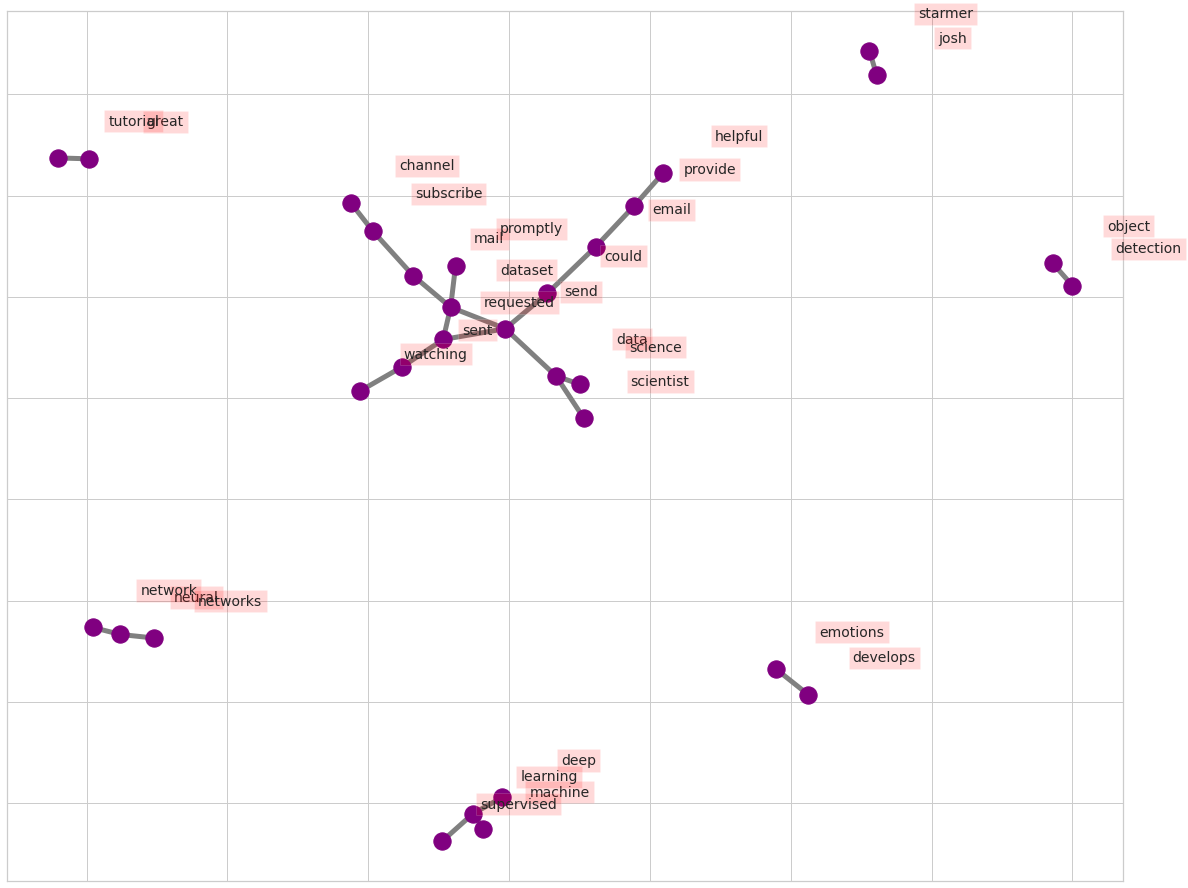

In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(20, 16))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=5,
                 edge_color='grey',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

# Bigrams and Trigrams

In [ ]:
data = df.no_stop_joined.values.tolist()

In [ ]:
print(data[:1])

['enroll free machine learning course completion certificate']


# Tokenize

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(data))

print(data_words[125:158])

[['great', 'tutorial', 'helpful', 'course', 'could', 'send', 'datasets', 'used', 'tutorial', 'anshufirefox', 'hungry'], ['provide', 'files', 'singhabhi'], ['wonderful', 'content', 'could', 'send', 'data', 'fabioaosti'], ['much', 'could', 'email', 'data', 'sets', 'used', 'tutorial', 'email', 'zakaria', 'farah'], ['simplilearn', 'provide', 'datasets', 'emailid', 'tuhinkumar'], ['great', 'could', 'share', 'datasets', 'stest'], ['really', 'great', 'tutorial'], ['able', 'send', 'datasets', 'docs', 'implement', 'code', 'email', 'alsacemu'], ['tutorial', 'send', 'data', 'ariamehr'], ['absolutely', 'amazing', 'datasets', 'email', 'maithanhhuy'], ['simplilearn', 'tutorial', 'send', 'data', 'sets', 'power', 'point', 'used', 'tutorial', 'email', 'prasadjs', 'practice', 'implement'], ['provide', 'data', 'used', 'tutorial', 'shashanktr', 'emailid'], ['thankyou', 'tutorial', 'send', 'datasets', 'email', 'rajeshwarsingh'], ['helpful', 'share', 'datasets', 'used', 'tutorials', 'email', 'srivatsanraman

# Make Bigrams and Trigrams

In [ ]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['possible', 'dataset', 'want', 'implement', 'codes', 'advance']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Lemmatization

In [ ]:
def lemmatization(comment, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    comment_out = []
    for sent in comment:
        doc = nlp(" ".join(sent)) 
        comment_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return comment_out

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = pd.Series(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))

In [ ]:
print(df)

           channel  ...                                         lemmatized
0      Simplilearn  ...             [enroll, free, machine, learn, course]
1      Simplilearn  ...                                                 []
2      Simplilearn  ...  [watch, dataset, mail, show, channel, use, but...
3      Simplilearn  ...                                     [datum, reach]
4      Simplilearn  ...  [great, tutorial, could, send, dataset, use, t...
...            ...  ...                                                ...
47076      Telusko  ...           [google, rest, coincidentally, uploaded]
47077      Telusko  ...                                [angular, tutorial]
47078      Telusko  ...                                [wait, next, video]
47079      Telusko  ...              [upload, datum, structure, algorithm]
47080      Telusko  ...                     [make, playlist, advance, use]

[47081 rows x 11 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47081 entries, 0 to 47080
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   channel              47081 non-null  object
 1   name                 47080 non-null  object
 2   comment              47081 non-null  object
 3   date                 47081 non-null  object
 4   time                 47081 non-null  object
 5   likes                47081 non-null  int64 
 6   tidy_comment         47081 non-null  object
 7   tidy_comment_tokens  47081 non-null  object
 8   tokens_no_stop       47081 non-null  object
 9   no_stop_joined       47081 non-null  object
 10  lemmatized           47081 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


# Stemming

In [ ]:
stemmer = PorterStemmer()

In [ ]:
df['stemmed'] = df['lemmatized'].apply(lambda x : [stemmer.stem(y) for y in x])

In [ ]:
print(df)

           channel  ...                                            stemmed
0      Simplilearn  ...                [enrol, free, machin, learn, cours]
1      Simplilearn  ...                                                 []
2      Simplilearn  ...  [watch, dataset, mail, show, channel, use, but...
3      Simplilearn  ...                                     [datum, reach]
4      Simplilearn  ...  [great, tutori, could, send, dataset, use, tut...
...            ...  ...                                                ...
47076      Telusko  ...                  [googl, rest, coincident, upload]
47077      Telusko  ...                                  [angular, tutori]
47078      Telusko  ...                                [wait, next, video]
47079      Telusko  ...               [upload, datum, structur, algorithm]
47080      Telusko  ...                      [make, playlist, advanc, use]

[47081 rows x 12 columns]


# Create Dictionary and Corpus

In [ ]:
# Create Dictionary
id2word_stemmed = corpora.Dictionary(df['stemmed'])

In [ ]:
# Create Dictionary
id2word_lemma = corpora.Dictionary(df['tokens_no_stop'])

In [ ]:
# Create Dictionary
id2word_tidy = corpora.Dictionary(df['tidy_comment_tokens'])

In [ ]:
print(id2word_stemmed)

Dictionary(13246 unique tokens: ['cours', 'enrol', 'free', 'learn', 'machin']...)


In [ ]:
print(id2word_lemma)

Dictionary(29222 unique tokens: ['certificate', 'completion', 'course', 'enroll', 'free']...)


In [ ]:
print(id2word_tidy)

Dictionary(29313 unique tokens: ['certificate', 'completion', 'course', 'enroll', 'free']...)


In [ ]:
# Create Corpus
comment_stemmed = df['stemmed']

In [ ]:
df['stemmed'][1267]

['teach',
 'superb',
 'even',
 'person',
 'proper',
 'infact',
 'first',
 'sensit',
 'specif',
 'accuraci',
 'threshold_valu',
 'cover',
 'session',
 'take',
 'wide',
 'exampl',
 'logist',
 'clear',
 'good',
 'switch',
 'machin',
 'learn',
 'cours']

In [ ]:
df['comment'][1267]

'Richard was great.. The way he taught Linear regression was superb even a person who doesn&#39;t have any knowledge of python can understand it. But Mohan is not a proper teacher. Infact first he should go with logistic regression and Sensitivity specificity accuracy threshold value but he doesn&#39;t covered that.. This session is only good becoz of Richard. Mohan you took a wide example for logistic first atleast clear us with binary logistic.. Sorry but not happy with Mohan&#39;s lecture.. And all the best Richard you are a gem. Now switching to some other machine learning course..'

In [ ]:
comment_stemmed

0                      [enrol, free, machin, learn, cours]
1                                                       []
2        [watch, dataset, mail, show, channel, use, but...
3                                           [datum, reach]
4        [great, tutori, could, send, dataset, use, tut...
                               ...                        
47076                    [googl, rest, coincident, upload]
47077                                    [angular, tutori]
47078                                  [wait, next, video]
47079                 [upload, datum, structur, algorithm]
47080                        [make, playlist, advanc, use]
Name: stemmed, Length: 47081, dtype: object

In [ ]:
# Term Document Frequency
corpus_stemmed = [id2word_stemmed.doc2bow(comment) for comment in comment_stemmed]

In [ ]:
print(len(corpus_stemmed))

47081


In [ ]:
print(corpus_stemmed[36307])

[(119, 1), (178, 1), (241, 1)]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word_stemmed[id], freq) for id, freq in cp] for cp in corpus_stemmed[:3]]

[[('cours', 1), ('enrol', 1), ('free', 1), ('learn', 1), ('machin', 1)],
 [],
 [('button_wel', 1),
  ('channel', 1),
  ('cheer', 1),
  ('dataset', 1),
  ('mail', 1),
  ('show', 1),
  ('use', 1),
  ('watch', 1)]]

In [ ]:
# #Creating Topic Distance Visualization 
# pyLDAvis.enable_notebook()
# pyLDAvis.gensim_models.prepare(lda_model_stemmed, corpus_stemmed, id2word_stemmed)

# Build the LDA Model

In [ ]:
# Build LDA model
lda_model_stemmed = gensim.models.ldamodel.LdaModel(corpus=corpus_stemmed,
                                           id2word=id2word_stemmed,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model_stemmed.print_topics())
doc_lda_stemmed = lda_model_stemmed[corpus_stemmed]

[(0,
  '0.025*"error" + 0.023*"probabl" + 0.023*"take" + 0.022*"number" + '
  '0.020*"mean" + 0.020*"predict" + 0.016*"get" + 0.014*"instal" + '
  '0.013*"actual" + 0.013*"call"'),
 (1,
  '0.079*"use" + 0.074*"great" + 0.067*"work" + 0.058*"explain" + '
  '0.057*"cours" + 0.042*"test" + 0.040*"also" + 0.035*"well" + 0.033*"thing" '
  '+ 0.031*"give"'),
 (2,
  '0.095*"much" + 0.074*"rest" + 0.056*"love" + 0.031*"tensorflow" + '
  '0.029*"awesom" + 0.026*"method" + 0.026*"even" + 0.023*"nice" + '
  '0.022*"object" + 0.020*"stuff"'),
 (3,
  '0.171*"help" + 0.140*"tutori" + 0.096*"could" + 0.078*"need" + 0.037*"do" + '
  '0.033*"provid" + 0.023*"request" + 0.021*"like" + 0.015*"seri" + '
  '0.012*"effort"'),
 (4,
  '0.103*"learn" + 0.093*"model" + 0.062*"explan" + 0.061*"know" + '
  '0.052*"want" + 0.034*"question" + 0.028*"tri" + 0.024*"right" + '
  '0.020*"alway" + 0.017*"program"'),
 (5,
  '0.122*"good" + 0.069*"datum" + 0.053*"time" + 0.049*"find" + 0.028*"go" + '
  '0.027*"layer" + 0.

# Model Perplexity and Coherence Score

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_stemmed.log_perplexity(corpus_stemmed))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_stemmed = CoherenceModel(model=lda_model_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_lda_stemmed = coherence_model_lda_stemmed.get_coherence()
print('\nCoherence Score: ', coherence_lda_stemmed)


Perplexity:  -7.697790041568471

Coherence Score:  0.413909745977321


In [ ]:
lda_model_stemmed.save('gensim_model.gensim')

# Mallet Wrapper

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2021-08-07 19:44:39--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.1’

mallet-2.0.8.zip.1  100%[===================>]  15.43M  11.8MB/s    in 1.3s    

2021-08-07 19:44:40 (11.8 MB/s) - ‘mallet-2.0.8.zip.1’ saved [16184794/16184794]



In [ ]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
num_topics = 8
ldamallet_stemmed = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)

In [ ]:
# # Show Topics
pprint(ldamallet_stemmed.show_topics(formatted=False))

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet_stemmed = CoherenceModel(model=ldamallet_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_ldamallet_stemmed = coherence_model_ldamallet_stemmed.get_coherence()
print('\nCoherence Score (Stemmed): ', coherence_ldamallet_stemmed)

# Visualize with pyLDAvis

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
visualisation = pyLDAvis.gensim_models.prepare(lda_model_stemmed, corpus_stemmed, id2word_stemmed)

In [ ]:
visualisation

# Find optimal number of topics

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_stemmed, corpus=corpus_stemmed, texts=df['stemmed'], start=2, limit=26, step=3)

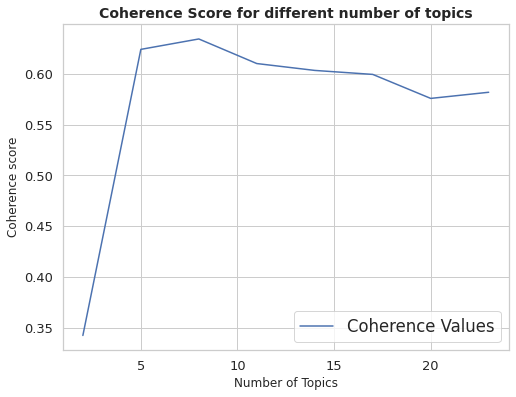

In [ ]:
# Show graph
limit=26; start=2; step=3;
x = range(start, limit, step)
plt.figure(figsize=(8,6))
plt.plot(x, coherence_values)
plt.title('Coherence Score for different number of topics', fontsize=14, fontweight="bold")
plt.xlabel("Number of Topics", fontsize=12)
plt.ylabel("Coherence score", fontsize=12)
plt.tick_params(axis='both', labelsize=13)
plt.legend(["Coherence Values"], loc='lower right')
plt.show()

In [ ]:
# Print the coherence scores for different number of topics
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3424
Num Topics = 5  has Coherence Value of 0.6243
Num Topics = 8  has Coherence Value of 0.6345
Num Topics = 11  has Coherence Value of 0.6103
Num Topics = 14  has Coherence Value of 0.6035
Num Topics = 17  has Coherence Value of 0.5996
Num Topics = 20  has Coherence Value of 0.5759
Num Topics = 23  has Coherence Value of 0.582


# Optimal Model

In [ ]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.038*"model" + 0.033*"file" + 0.027*"error" + 0.023*"line" + 0.022*"train" '
  '+ 0.021*"datum" + 0.018*"creat" + 0.017*"test" + 0.017*"instal" + '
  '0.016*"problem" + 0.015*"supervis" + 0.014*"tensorflow" + 0.014*"tri" + '
  '0.013*"step" + 0.013*"base" + 0.012*"import" + 0.012*"follow" + '
  '0.012*"featur" + 0.012*"build" + 0.011*"answer"'),
 (1,
  '0.037*"time" + 0.026*"thing" + 0.019*"comput" + 0.016*"mani" + 0.014*"feel" '
  '+ 0.013*"write" + 0.013*"actual" + 0.011*"hour" + 0.011*"understand" + '
  '0.010*"abl" + 0.010*"real" + 0.010*"long" + 0.009*"human" + 0.009*"stuff" + '
  '0.009*"talk" + 0.009*"person" + 0.009*"world" + 0.009*"back" + 0.009*"read" '
  '+ 0.008*"life"'),
 (2,
  '0.189*"learn" + 0.062*"explan" + 0.061*"machin" + 0.055*"work" + '
  '0.051*"understand" + 0.030*"code" + 0.024*"probabl" + 0.021*"part" + '
  '0.020*"concept" + 0.019*"deep" + 0.019*"give" + 0.018*"basic" + '
  '0.016*"time" + 0.016*"languag" + 0.016*"statist" + 0.015*"clear" + '
  '0.010

# Dominant Topic

In [ ]:
def format_topics_sentences(ldamodel=ldamallet_stemmed, corpus=corpus_stemmed, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each documen
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_stemmed, texts=df['stemmed'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.1682,"datum, cours, scienc, data, start, program, pr...","[enrol, free, machin, learn, cours]"
1,1,0.0,0.1250,"model, file, error, line, train, datum, creat,...",[]
2,2,5.0,0.2325,"dataset, tutori, send, watch, email, share, gr...","[watch, dataset, mail, show, channel, use, but..."
3,3,7.0,0.1544,"datum, cours, scienc, data, start, program, pr...","[datum, reach]"
4,4,5.0,0.1969,"dataset, tutori, send, watch, email, share, gr...","[great, tutori, could, send, dataset, use, tut..."
5,5,5.0,0.1500,"dataset, tutori, send, watch, email, share, gr...","[possibl, dataset, want, implement, code, advanc]"
6,6,5.0,0.2457,"dataset, tutori, send, watch, email, share, gr...","[view, tutori, help, provid, email, send, requ..."
7,7,5.0,0.1864,"dataset, tutori, send, watch, email, share, gr...","[amaz, tutori, simplilearn, help, dataset, peppa]"
8,8,5.0,0.2005,"dataset, tutori, send, watch, email, share, gr...","[great, tutori, share, dataset, use, mail]"
9,9,5.0,0.1798,"dataset, tutori, send, watch, email, share, gr...","[nice, tutori, send, dataset, use, tutori, pro..."


In [ ]:
df_dominant_topic[df_dominant_topic.Dominant_Topic == 2.0]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
97,97,2.0,0.1422,"learn, explan, machin, work, understand, code,...","[watch, machin, learn, cours, youtub, alway, r..."
105,105,2.0,0.1830,"learn, explan, machin, work, understand, code,...","[understand, start, basic, program, machin, le..."
112,112,2.0,0.1394,"learn, explan, machin, work, understand, code,...","[send, alot]"
113,113,2.0,0.1439,"learn, explan, machin, work, understand, code,...","[nice, explan, send, file, harshmehta]"
217,217,2.0,0.2321,"learn, explan, machin, work, understand, code,...","[tri, explain, kid, howev, incorrect, descript..."
...,...,...,...,...,...
47045,47045,2.0,0.1373,"learn, explan, machin, work, understand, code,...","[know, make, clear]"
47049,47049,2.0,0.1400,"learn, explan, machin, work, understand, code,...",[curl]
47052,47052,2.0,0.1394,"learn, explan, machin, work, understand, code,...","[good, explan, ever]"
47062,47062,2.0,0.1480,"learn, explan, machin, work, understand, code,...","[great, work, help, develop, learn, scratch]"


# Total Topic Distrubution across documents 

In [ ]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

df_dominant_topics = pd.merge(topic_contribution, topic_num_keywords, how='inner', on='Dominant_Topic')
df_dominant_topics

,Dominant_Topic,percentage,Topic_Keywords
0,5.0,0.1601,"dataset, tutori, send, watch, email, share, gr..."
1,4.0,0.1600,"good, video, realli, make, explain, great, lov..."
2,0.0,0.1468,"model, file, error, line, train, datum, creat,..."
3,1.0,0.1265,"time, thing, comput, mani, feel, write, actual..."
4,7.0,0.1160,"datum, cours, scienc, data, start, program, pr..."
5,2.0,0.1152,"learn, explan, machin, work, understand, code,..."
6,3.0,0.0978,"valu, number, layer, point, neuron, weight, im..."
7,6.0,0.0777,"make, find, question, peopl, good, differ, sim..."


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8355,"model, file, error, line, train, datum, creat,...","[help, instal, pycocotool, follow, error, coll..."
1,1.0,0.5050,"time, thing, comput, mani, feel, write, actual...","[solv, poem, give, write, regular_express, fol..."
2,2.0,0.5735,"learn, explan, machin, work, understand, code,...","[scientist, skill, datum, scienc, role, data, ..."
3,3.0,0.6310,"valu, number, layer, point, neuron, weight, im...","[roughli, start, valu, repres, origin, imag, n..."
4,4.0,0.2947,"good, video, realli, make, explain, great, lov...","[realli, inspir, love, explain, topic, easili,..."
5,5.0,0.2828,"dataset, tutori, send, watch, email, share, gr...","[share, mail, sent_request, dataset, mail, sub..."
6,6.0,0.6139,"make, find, question, peopl, good, differ, sim...","[questionnair, peopl, work, tirelessli, find, ..."
7,7.0,0.4623,"datum, cours, scienc, data, start, program, pr...","[studi, scienc, train, bangalor, certifi, expe..."


In [ ]:
print(sent_topics_sorteddf_mallet['Text'][1765])

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic', 'Topic_Keywords', 'Num_comment', 'Perc_comment']

# Show
df_dominant_topics['Perc_comment'] = df_dominant_topics['Perc_comment'] * 100

In [ ]:
df_dominant_topics['Text'] = sent_topics_sorteddf_mallet['Text']

In [ ]:
df_dominant_topics

,Topic,Topic_Keywords,Num_comment,Perc_comment,Text
0.0,0.0,"model, file, error, line, train, datum, creat,...",6911,14.68,"[help, instal, pycocotool, follow, error, coll..."
1.0,1.0,"time, thing, comput, mani, feel, write, actual...",5955,12.65,"[solv, poem, give, write, regular_express, fol..."
2.0,2.0,"learn, explan, machin, work, understand, code,...",5422,11.52,"[scientist, skill, datum, scienc, role, data, ..."
3.0,3.0,"valu, number, layer, point, neuron, weight, im...",4603,9.78,"[roughli, start, valu, repres, origin, imag, n..."
4.0,4.0,"good, video, realli, make, explain, great, lov...",7532,16.00,"[realli, inspir, love, explain, topic, easili,..."
5.0,5.0,"dataset, tutori, send, watch, email, share, gr...",7539,16.01,"[share, mail, sent_request, dataset, mail, sub..."
6.0,6.0,"make, find, question, peopl, good, differ, sim...",3657,7.77,"[questionnair, peopl, work, tirelessli, find, ..."
7.0,7.0,"datum, cours, scienc, data, start, program, pr...",5462,11.60,"[studi, scienc, train, bangalor, certifi, expe..."


Total comment 47081


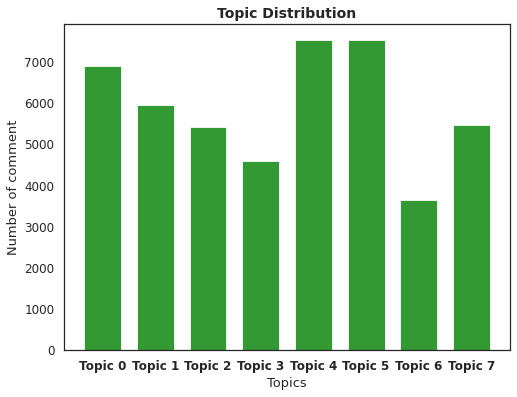

In [ ]:
sns.set_style("white")
label = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7']
freq = df_dominant_topics['Num_comment']
index = np.arange(len(freq))

print("Total comment", df_dominant_topics['Num_comment'].sum())
plt.figure(figsize=(8,6), facecolor='white')
plt.bar(index, freq, alpha=0.8, color= 'green', width=0.7)
plt.xlabel('Topics', fontsize=13)
plt.ylabel('Number of comment', fontsize=13)
plt.xticks(index, label, fontsize=11, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Topic Distribution', fontsize=14, fontweight="bold")
plt.show()

# Save Results

In [ ]:
df_dominant_topics.to_pickle('/content/drive/MyDrive/YouTube-Project/topic-modeling-reply-merge.pkl')